<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Assignment 2 // Statistical Treatment for Retail Dataset</font></h1>

## Data Cleansing

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
mpl.style.use(['ggplot'])

%matplotlib inline

# reading csv data
nyc_rolling_sales = pd.read_csv('dataset/nyc-rolling-sales.csv')
# nyc_rolling_sales.dropna(inplace=True)
# nyc_rolling_sales= nyc_rolling_sales[:20]
# nyc_rolling_sales

In [2]:
nyc_rolling_sales.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [3]:
cnt=0
for row in nyc_rolling_sales['SALE PRICE']:
    try:
        int(row)        
    except ValueError:        
        nyc_rolling_sales.loc[cnt, 'SALE PRICE']=np.nan
    cnt+=1

In [4]:
# change all 'object' to numeric

nyc_rolling_sales['SALE PRICE'] = pd.to_numeric(nyc_rolling_sales['SALE PRICE'], errors='coerce')

In [5]:

nyc_rolling_sales.info()
# nyc_rolling_sales.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       84548 non-null  object 
 8   BUILDING CLASS AT PRESENT       84548 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                84548 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [6]:
nyc_rolling_sales.isna().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

## Measure of Central Tendency: Mean

In [7]:
# Pandas Mean
sale_price_mean = nyc_rolling_sales['BOROUGH'].mean()
sale_price_mean

2.9987581019066094

In [8]:
# Numpy Mean
np.mean(nyc_rolling_sales['BOROUGH'])

2.9987581019066094

## Measure of Central Tendency: Median

In [9]:
# Pandas Median
sale_price_median = nyc_rolling_sales['BOROUGH'].median()
sale_price_median

3.0

In [10]:
# Numpy Median ignore nan value
np.nanmedian(nyc_rolling_sales['BOROUGH'])

3.0

## Measure of Central Tendency: Modus

In [11]:
# Pandas mode
sale_price_modus = nyc_rolling_sales[['BOROUGH']].dropna().mode()
sale_price_modus

,BOROUGH
0,4


In [12]:
# scipy mode
from scipy import stats
stats.mode(nyc_rolling_sales['BOROUGH'].dropna())

ModeResult(mode=array([4], dtype=int64), count=array([26736]))

## Measure of Spread: Range

In [13]:
np.ptp(nyc_rolling_sales['BOROUGH'].dropna())

4

In [14]:
print(nyc_rolling_sales['BOROUGH'].max()-nyc_rolling_sales['BOROUGH'].min())

4


## Measure of Spread: Variance

In [15]:
# pandas variance
np.var(nyc_rolling_sales['BOROUGH'], ddof=1)

1.663558371091821

In [16]:
# statistics variance
import statistics
statistics.variance(nyc_rolling_sales['BOROUGH'].dropna())

1.6635583710918211

## Measure of Spread: Standard Deviation

In [17]:
# pandas standard deviation
np.std(nyc_rolling_sales['BOROUGH'], ddof=1)

1.2897900492296492

In [18]:
# statistics standard deviation
statistics.stdev(nyc_rolling_sales['BOROUGH'].dropna())

1.2897900492296492

## Probability Distribution

In [19]:
# discrete probability distributions adalah Bernoulli distribution, Binomial distribution, Poisson distribution, dll.
# Student Menganalisa Distribusi Data Dan Menarik Informasi Dari Distribusi Tersebut
# Uniform Distribution - Bernoulli Distribution

### Uniform Distribution

In [20]:
from scipy.stats import uniform
import seaborn as sns

data_distribusi = nyc_rolling_sales['BOROUGH']

data_uniform = uniform.rvs(data_distribusi)
data_uniform

array([1.72321676, 1.88140333, 1.25549518, ..., 5.55059069, 5.35244692,
       5.33956784])

d:\installation\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

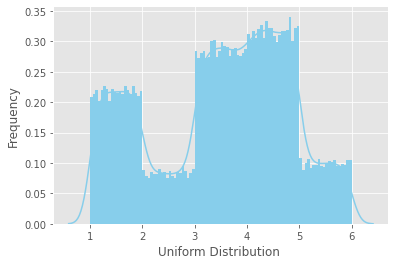

In [21]:
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

### Normal Distribution

d:\installation\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

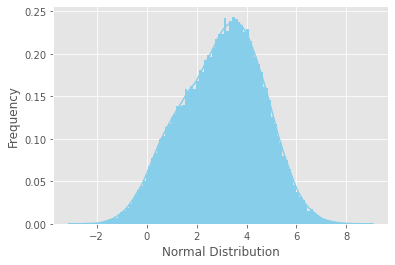

In [22]:
from scipy.stats import norm

data_normal = norm.rvs(data_distribusi)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

### Gamma Distribution

d:\installation\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Gamma Distribution'), Text(0, 0.5, 'Frequency')]

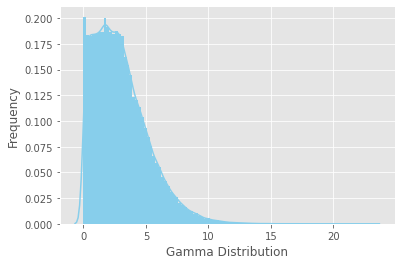

In [23]:
from scipy.stats import gamma
data_gamma = gamma.rvs(data_distribusi)

ax = sns.distplot(data_gamma,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

### Exponential Distribution

d:\installation\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Gamma Distribution'), Text(0, 0.5, 'Frequency')]

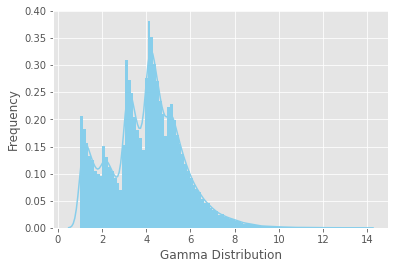

In [24]:
from scipy.stats import expon
data_expon = expon.rvs(data_distribusi)

ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

### Poisson Distribution

d:\installation\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

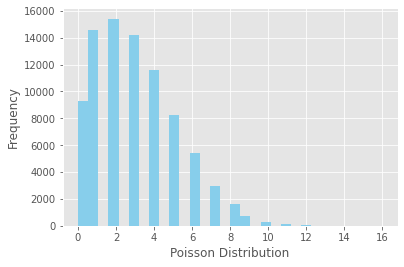

In [25]:
from scipy.stats import poisson
data_poisson = poisson.rvs(data_distribusi)

ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

## Confidence Intervals

In [26]:
# Mengimplementasikan confidence intervals

In [27]:
data_CI = nyc_rolling_sales['BOROUGH']
sum_data_CI = data_CI.value_counts()
# sum_data_CI[1].mean()
mean_data_CI = data_CI.mean()
std_data_CI = statistics.stdev(data_CI)
n_data_CI = data_CI.count()
z_data_CI = 1.96

In [28]:
se_data_CI = std_data_CI / np.sqrt(n_data_CI)

In [29]:
lcb_data_CI = mean_data_CI - z_data_CI* se_data_CI  #lower limit of the CI
ucb_data_CI = mean_data_CI + z_data_CI* se_data_CI  #upper limit of the CI
lcb_data_CI, ucb_data_CI

(2.990064026072443, 3.0074521777407757)

## Hypothesis Testing

In [30]:
# apakah rata2 total unit di kota EAST NEW YORK lebih besar dari kota CHELSEA, seperti data EAST NEW YORK yang 
# rata2 total unit di EAST NEW YORK lebih kecil dari CHELSEA // u1 < u2 // NULL HYPOTHESIS
# u1 >= u2 // ALTERNATIVE HYPOTHESIS

In [31]:
enw = nyc_rolling_sales[nyc_rolling_sales['NEIGHBORHOOD'] == 'EAST NEW YORK']
n1 = len(enw)
mean1 = enw['TOTAL UNITS'].mean()
std1 = enw['TOTAL UNITS'].std()
(n1, mean1, std1)

(982, 2.370672097759674, 5.215545194733071)

In [32]:
chl = nyc_rolling_sales[nyc_rolling_sales['NEIGHBORHOOD'] == 'CHELSEA']
n2 = len(chl)
mean2 = chl['TOTAL UNITS'].mean()
std2 = chl['TOTAL UNITS'].std()
(n2, mean2, std2)

(803, 2.0435865504358657, 15.068897236645988)

In [33]:
import statsmodels.api as sm
sm.stats.ztest(enw['TOTAL UNITS'].dropna(), chl['TOTAL UNITS'].dropna(),alternative='two-sided')

(0.635286715048735, 0.5252414364370559)

p-value (0.525) lebih kecil, maka __reject the Null Hypothesis__ bahwa rata-rata EAST NEW YORK lebih kecil dari CHELSEA